In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [30]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Downloads/hawaii.sqlite")

In [34]:
# reflect an existing database into a new model
# reflect the tables
b=automap_base()
b.prepare(engine, reflect=True)

In [24]:
# View all of the classes that automap found
b.classes.keys()

['measurement', 'station']

In [35]:
# Save references to each table
Station=b.classes.station
Measurement=b.classes.measurement
session=Session(engine)
ref=inspect(engine)
stations=engine.execute('SELECT * FROM Station')
print(stations.keys())

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [55]:
measurements=engine.execute('SELECT * FROM Measurement LIMIT 30')
print(measurements.keys())

['id', 'station', 'date', 'prcp', 'tobs']


In [97]:
# Find the most recent date in the data set.
last_date=(session.query(Measurement.date)
                    .order_by(Measurement.date.desc())
                    .first())
last_date


('2017-08-23')

Query: 2016-08-22


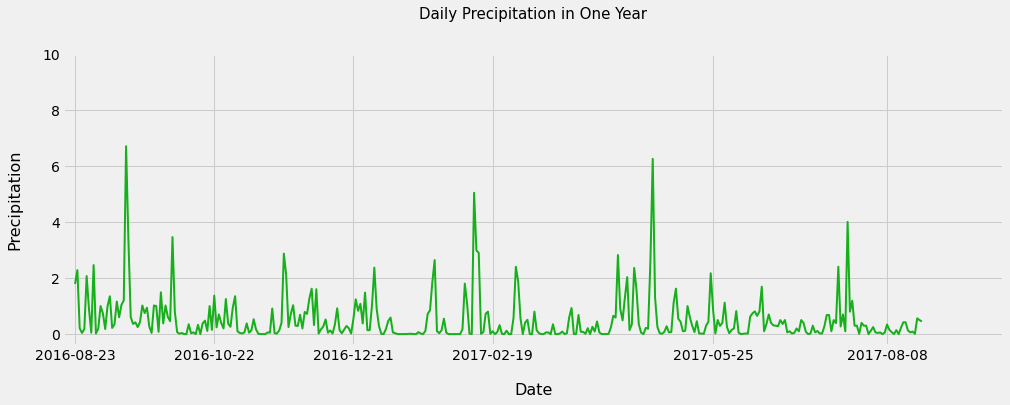

In [100]:
session=Session(engine)
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

new_date=dt.date(2017,8,23) - dt.timedelta(days=366)
print('Query:', new_date)

# Perform a query to retrieve the data and precipitation scores
pre_scores=(session.query(Measurement.date,func.max(Measurement.prcp))
                  .filter(func.strftime('%Y-%m-%d',Measurement.date) > new_date)
                  .group_by(Measurement.date)
                  .all())
pre_scores
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df=pd.DataFrame(pre_scores, columns=['date', 'prcp'])
prcp_df.set_index('date',inplace=True)
prcp_df.head(10)
# Sort the dataframe by date
prcp_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.rcParams['figure.figsize']=(15,5)
prcp_df.plot(linewidth=2,alpha=1,rot=0, 
             xticks=(0,60,120,180,275,350,400),
             color='xkcd:green')

plt.xlim(-5,400)
plt.ylim(-0.4,10)
plt.yticks(size=14)
plt.xticks(fontsize=14)
plt.legend('',frameon=False)
plt.xlabel('Date',fontsize=16,color='black',labelpad=20)
plt.ylabel('Precipitation',fontsize=16,color='black',labelpad=20)
plt.title('Daily Precipitation in One Year',fontsize=15,pad=35)

plt.show()


In [102]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pre_df=pd.DataFrame(pre_scores, columns=['date', 'prcp'])
pre_df
pre_df.dropna()

pre_df.describe()

,prcp
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


In [80]:
# Design a query to calculate the total number stations in the dataset
 
total_stations=session.query(Station).count()
print(total_stations)

9


In [103]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

station1=(session.query(Measurement.station,func.count(Measurement.station))
                         .group_by(Measurement.station)
                         .order_by(func.count(Measurement.station).desc())
                         .all())
station1

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [104]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


tobs=[Measurement.station, 
             func.min(Measurement.tobs), 
             func.max(Measurement.tobs), 
             func.avg(Measurement.tobs)]

most_active_station=(session.query(*tobs)
                       .filter(Measurement.station=='USC00519281')
                       .all())
most_active_station

ST_avg_temp=pd.DataFrame(most_active_st, columns=['station', 'min_temp', 
                                                          'max_temp', 'avg_temp'])
ST_avg_temp.set_index('station', inplace=True)
ST_avg_temp

,min_temp,max_temp,avg_temp
station,,,
USC00519281,54.0,85.0,71.663781


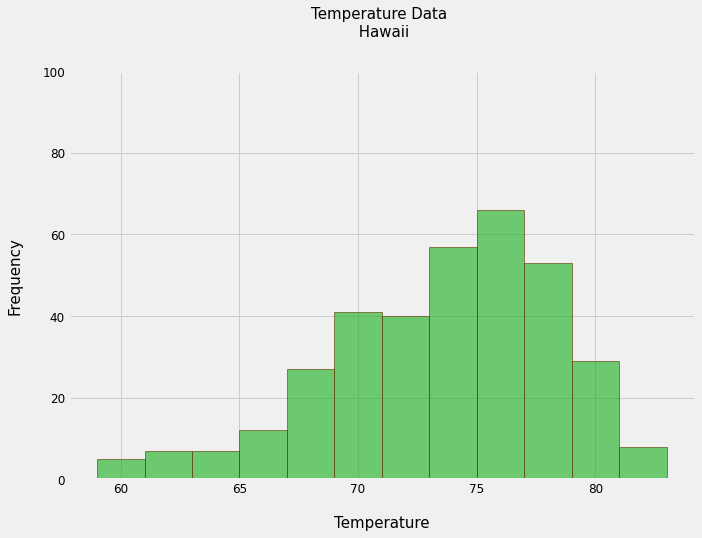

In [108]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_data=(session.query(Measurement.date,(Measurement.tobs))
                  .filter(func.strftime(Measurement.date) > new_date)
                  .filter(Measurement.station=='USC00519281')
                  .all())
temp_data


tobs_df=pd.DataFrame(year_tobs)
tobs_df.set_index('date',inplace=True)

plt.rcParams['figure.figsize']=(10,7)
plt.hist(tobs_df['tobs'],bins=12,alpha=0.6,edgecolor='xkcd:brown',
         linewidth=1,color='xkcd:green')

plt.title('Temperature Data \n Hawaii',fontsize=15,pad=35)
plt.xlabel('Temperature',fontsize=15,color='black',labelpad=20)
plt.ylabel('Frequency',fontsize=15,color='black',labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,100)

plt.show()

In [ ]:
# Close Session
session.close()